In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# simulation 
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
# analytical
from TO_sim.get_sec_r import get_r_Fun,get_rp


In [288]:
seed =11
N = 5000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 3
dt = 0.1
t = np.arange(0,10000,dt)
# K = 5.3
K = 6
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega)

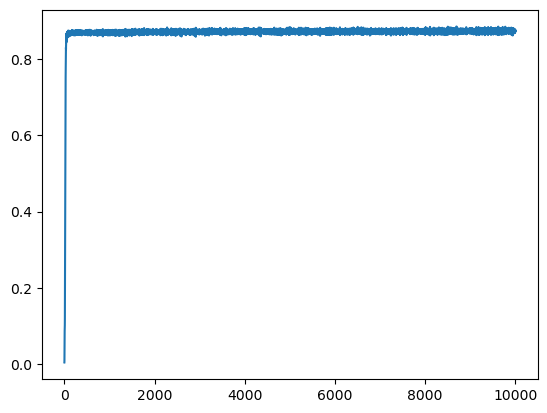

In [289]:
plt.plot(t,rs)

In [290]:
def get_rm(x):
    r_mc =  np.cumsum(x, axis=0)
    r_m =  (r_mc[1000:] - r_mc[:-1000])/1000
    return r_m

In [291]:
v_t = np.mean(dtheta[-1000:],axis=0)
con0 = np.abs(v_t) < 0.1 
c_0, = np.where(con0)
c_p, = np.where(np.logical_and(~con0, omega > 0))
c_m, = np.where(np.logical_and(~con0, omega < 0))


r0_ = np.abs(np.mean(np.exp(1j*theta[:,c_0]),axis=1) * len(c_0)/N)
rp_ = np.abs(np.mean(np.exp(1j*theta[:,c_p]),axis=1) * len(c_p)/N)
rm_ = np.abs(np.mean(np.exp(1j*theta[:,c_m]),axis=1) * len(c_m)/N)

In [292]:
rs_m = get_rm(rs)
r_p = get_rm(rp_)
r_m = get_rm(rm_)
r_0 = get_rm(r0_)

In [293]:
# Ks = np.arange(0,20,0.1)

F = get_r_Fun(m)
# R_0u = F['u']['R0'](Ks)
# idx = np.isnan(R_0u)
# K_urp = Ks[~idx]
# R_0u = R_0u[~idx]
OPS = F['u']['OPS'](K)
# _,rp_d,rp_u,rp0_d,rp0_u = get_rp(K_urp,R_0u,OPS,m,MAX=False)

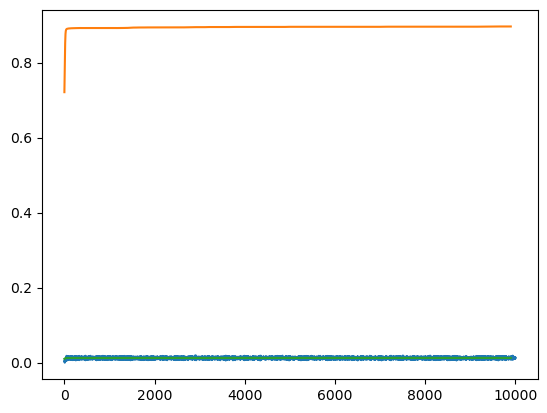

In [294]:
plt.plot(t,rp_)
plt.plot(t[:-1000],r_0)
plt.plot(t[:-1000],r_p)

In [295]:
def get_A_rm(r0=r_0,rp=r_p,OPS=OPS,m=m,K=K):
    return r0 - m*K*rp*r0/(m**2*OPS**2 + 1)

In [296]:
A_rm = get_A_rm()
I, = np.where(A_rm - rs_m>1e-3)
t[:-1000][I[-1]]

r_0M = np.max(r_0)
I_M =  np.where(r_0 > r_0M -1e-3 )[0][0]
t[I_M]

4954.3

In [297]:
v_tI = np.mean(dtheta[I_M-500:I_M],axis=0)

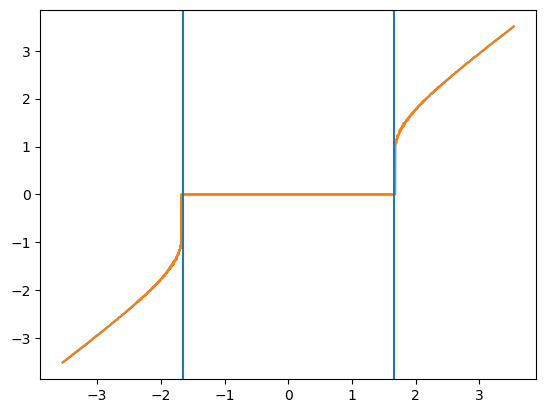

In [298]:
plt.plot(omega, v_t)
plt.plot(omega, v_tI)
plt.axvline(OPS)
plt.axvline(-OPS)

Text(0.5, 1.0, '$m = 3, K = 6$')

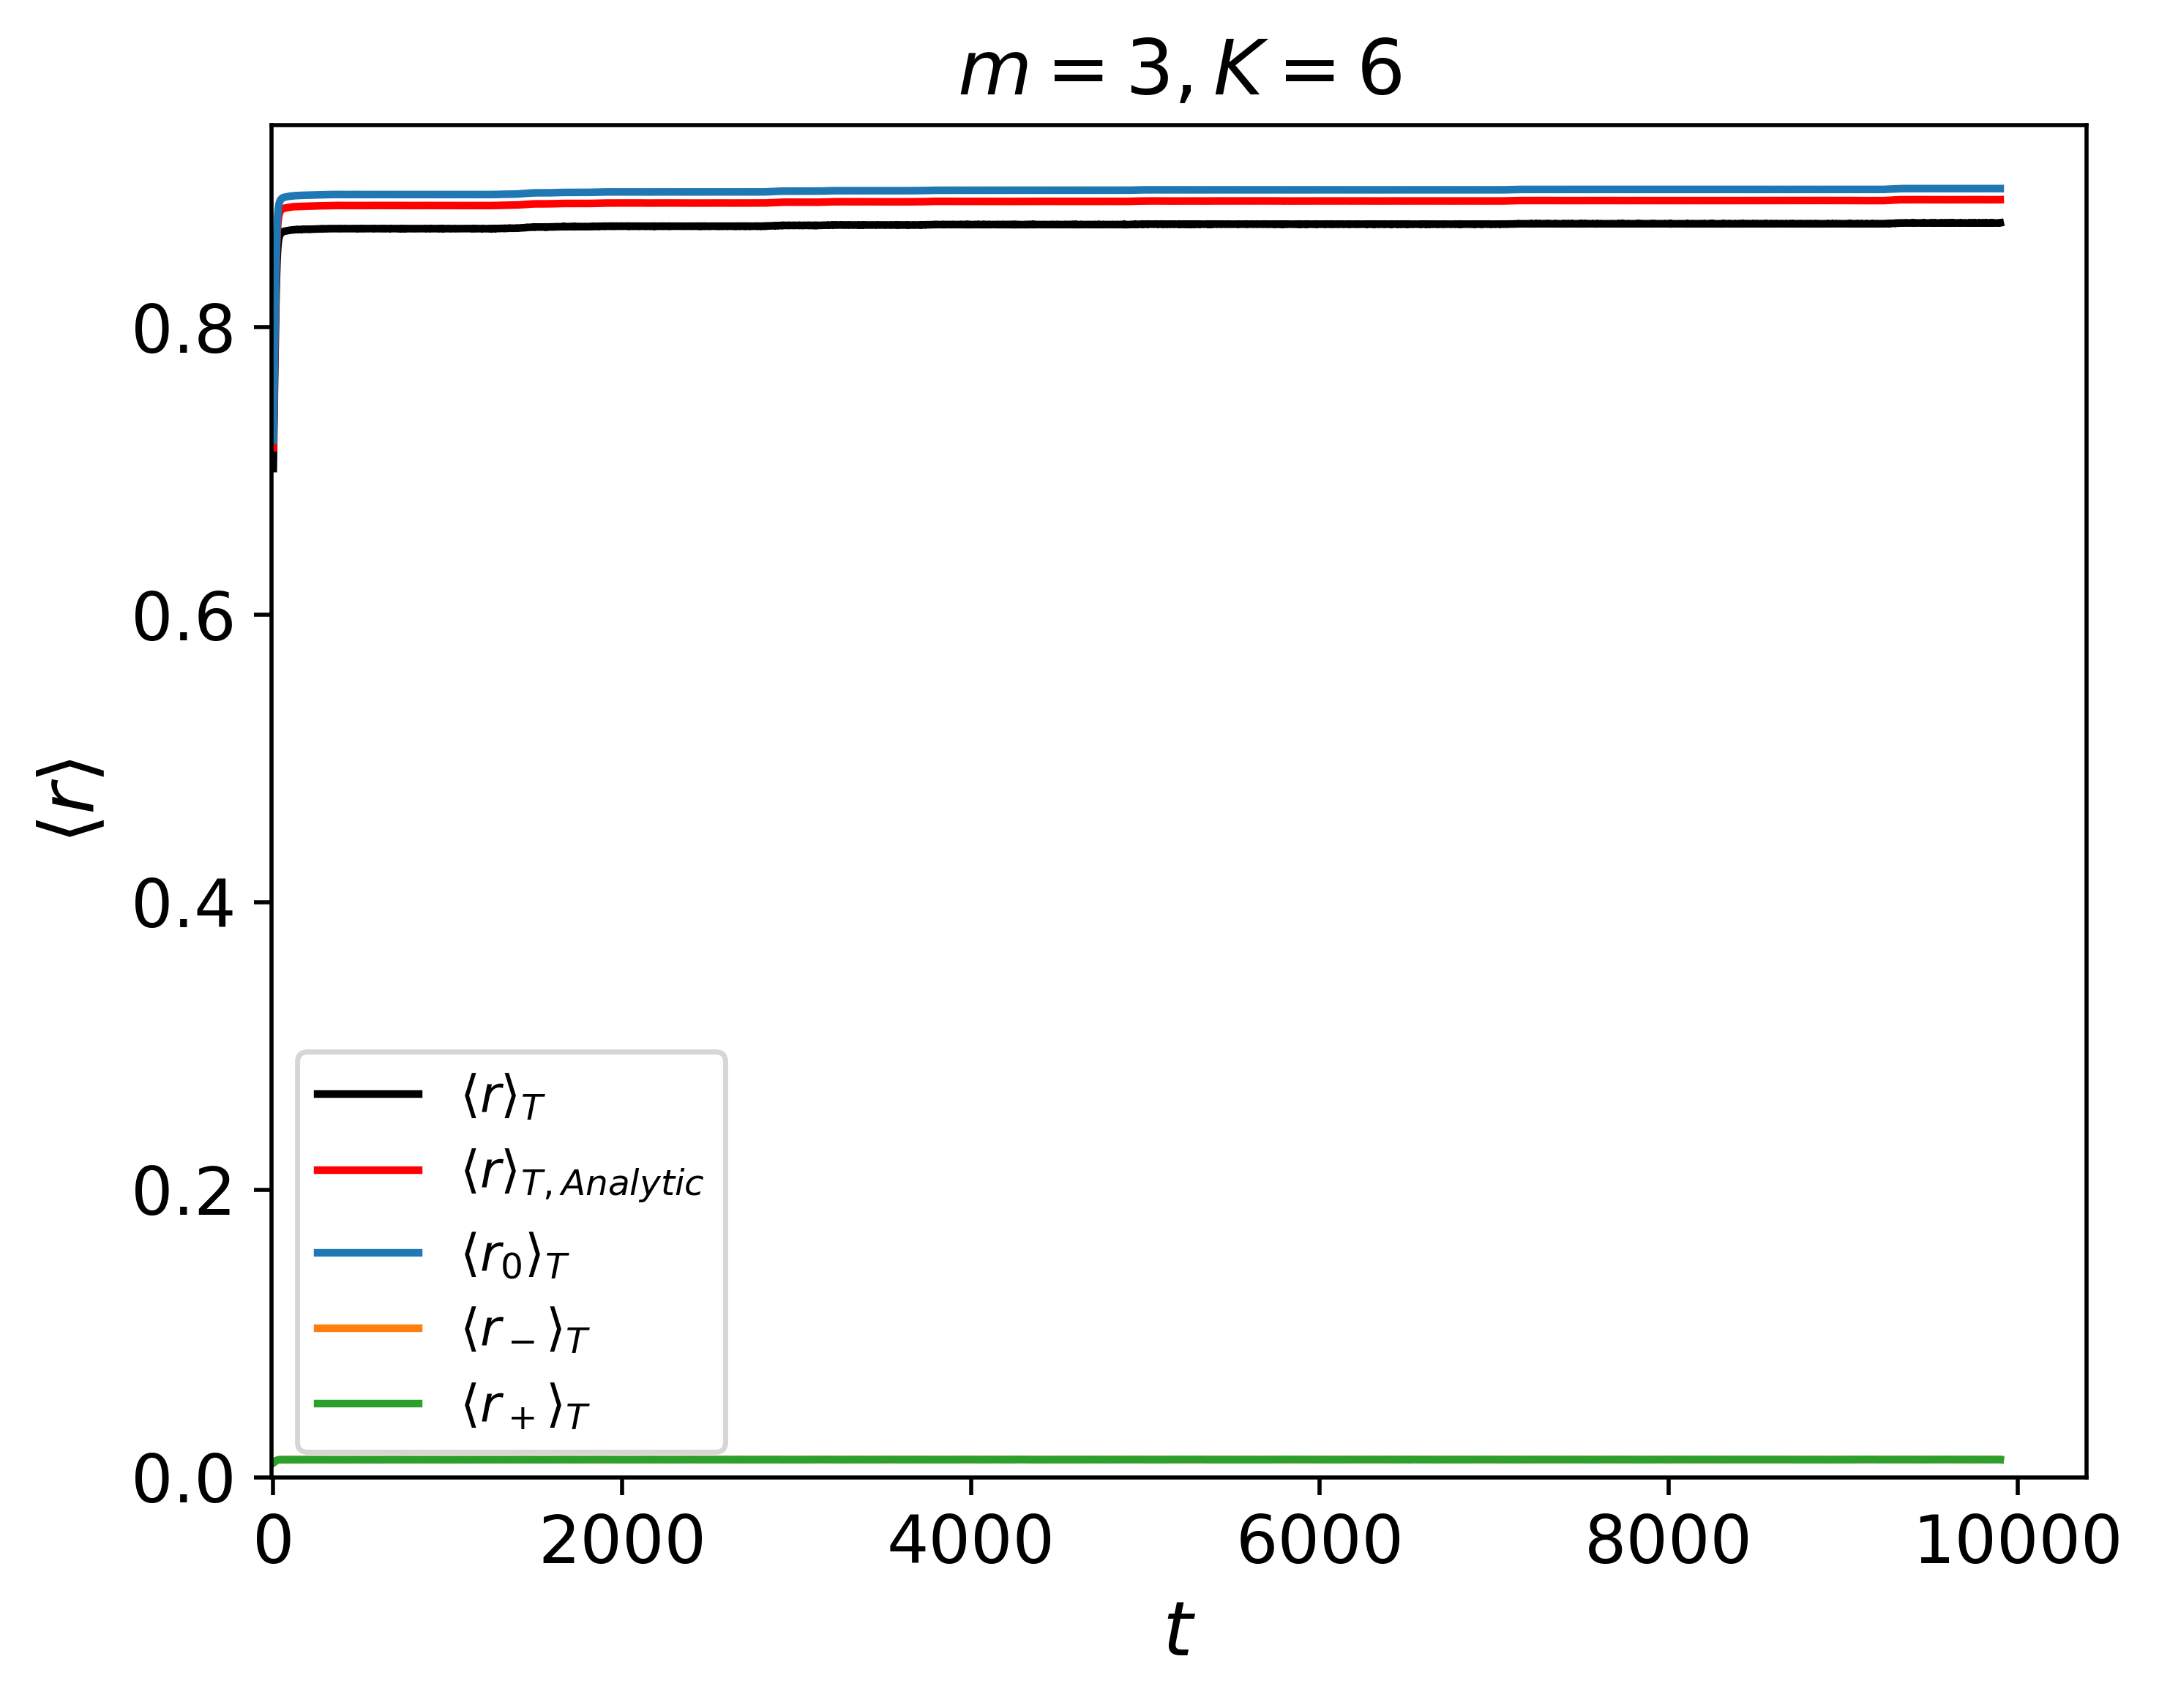

In [299]:
plt.figure(dpi=500)
# plt.plot(t[:],abs(get_A_rm(r0_,rp_,OPS,m,K)))
plt.plot(t[:-1000],rs_m,color='black',label=r'$\langle r \rangle_T$')
plt.plot(t[:-1000],abs(get_A_rm()),color='red',label=r'$\langle r \rangle_{T,Analytic}$')
plt.plot(t[:-1000],r_0,label=r'$\langle r_0 \rangle_T$')
plt.plot(t[:-1000],r_m,label=r'$\langle r_- \rangle_T$')
plt.plot(t[:-1000],r_p,label=r'$\langle r_+ \rangle_T$')
plt.xlim(-10,)
plt.ylim(0,)
plt.legend()
plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$\langle r\rangle$',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(rf'$m = {m}, K = {K}$',fontsize=15)
# plt.axvline(t[:-1000][I[-1]])
# plt.axvline(t[:-1000][I_M])

# COS check

In [300]:
T = theta[-5000:,c_p]*np.sqrt(K*rp_[-1]/m)
E = np.exp(1j*T)
E_C = np.sum(E[-1000:],axis=0)/1000

In [301]:
E_C.shape

(232,)

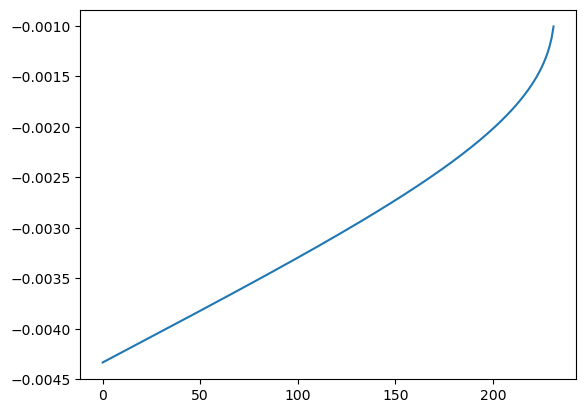

In [303]:
# plt.plot(-np.real(E_C) )
plt.plot(-K*rp_[-1]*m/(2*(1+m**2*omega[c_p]**2)))


In [221]:
E_C = np.cumsum(E,axis=0)
E_M = (E_C[1000:] - E_C[:-1000])/1000

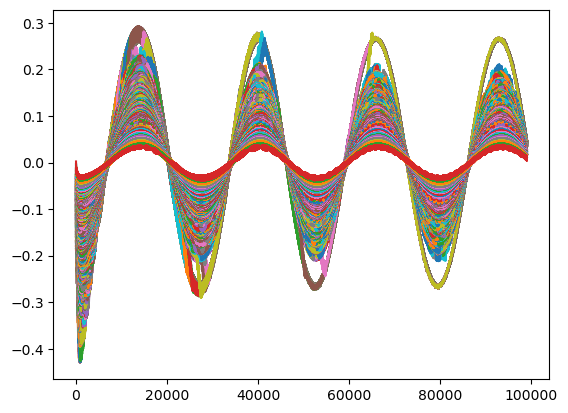

In [ ]:
plt.plot(np.real(E_M))